In [ ]:
#es 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file1 = pd.read_excel(r'c:\Users\Andrea C\Desktop\its\Py\datascience\roba_es_preprocess\dataset_clustering_outlier_esercizio.xlsx')

file1.head()

np.random.seed(42)

deviazione_standard = np.random.normal(100,20,200)

,X,Y
0,32.483571,22.923146
1,29.308678,27.896773
2,33.238443,28.286427
3,37.615149,25.988614
4,28.829233,29.193571


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

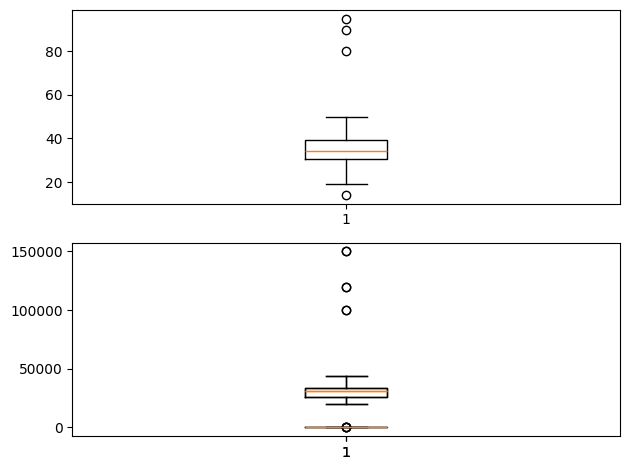

In [47]:
import numpy as np


file2 = pd.read_excel(r'c:\Users\Andrea C\Desktop\its\Py\datascience\roba_es_preprocess\dataset_outlier_iqr_zscore.xlsx')

file2.head()

fig, ax = plt.subplots(2)

ax[0].boxplot(file2['Eta'])
ax[1].boxplot(file2['Reddito'])

bx1 = plt.boxplot(file2['Reddito'])
bx2 = plt.boxplot(file2['Eta'])

plt.tight_layout()  

q1_reddit = file2['Reddito'].quantile(file2,25)
q3_reddit = file2['Reddito'].quantile(file2,75)
iqr = q3_reddit-q1_reddit
print(f"Q1 reddit : {q1_reddit}, Q3 reddit : {q3_reddit}")

Numero di Outliers (K-mean) :  11
Distanze :  [ 7.97756037  2.31001461  4.44764735  9.38924129  1.08676591  1.85779669
 12.66023599  4.65921822  1.90978389  3.53427808  9.91992181  1.59097014
  1.98609581 14.9659872   7.93689904  2.41817905  4.30688149  6.48743084
  6.6731415   7.22265231  8.92789223  4.7654807   6.89880905  9.61090637
  3.35287855 10.82878017  7.1704394   4.0320823   2.24838896  2.80741227
  8.26637765 10.03630355  5.56187978  5.00585035  6.85150532  9.23736724
  4.50483713  9.20521038  7.02412982  6.59821478  4.56250739  6.53709205
  8.2450487   1.02493205  6.70846126  4.65834887  6.57049641  9.11382688
  3.46287555  8.14240724  2.61335795  1.91241664  4.45135735  3.94978237
  6.06138587  6.61476829  9.7442443   2.29747602  6.62377567  6.43524861
  5.33140988  3.73330505  7.33878693  6.75859254  6.68276065  7.78042305
  3.92686781 10.93784681  2.9527684   4.66937637  5.3207705   9.48670847
  0.8383916   8.72714212 12.38093734  6.26881814  1.21731795  7.09907634
  1.9

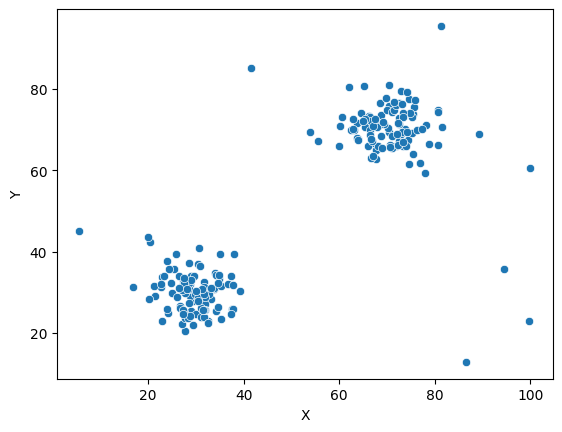

In [31]:
#es 3

from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_excel(r'c:\Users\Andrea C\Desktop\its\Py\datascience\roba_es_preprocess\dataset_clustering_outlier_esercizio.xlsx')

df1.head()
df1.describe()

sns.scatterplot(data=df1,x='X',y='Y')

X = df1[['X','Y']].values

kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels_km = kmeans.labels_

distances_km = np.linalg.norm(X - centroids[labels_km],axis=1)

threshold_km = np.percentile(distances_km,95)
outliers_km = distances_km > threshold_km


distances = kmeans.transform(X).min(axis=1)

print("Numero di Outliers (K-mean) : ",outliers_km.sum())
print("Distanze : ",distances)
print(f"\n{np.where(outliers_km)[0]}")

In [ ]:
#es 3 DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=7,min_samples=5)

labels_db = dbscan.fit_predict(X)

outliers_db = (labels_db == -1)

print("Numero di outlier : ",outliers_db.sum())
print("indici outlier : ",np.where(outliers_db)[0].tolist())

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [51]:
#es 4
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

df2 = pd.read_excel(r'c:\Users\Andrea C\Desktop\its\Py\datascience\roba_es_preprocess\dataset_sbilanciato_esercizio.xlsx')

print(df2.head())

x = df2.drop('Target',axis=1)
y = df2['Target']

print(df2['Target'].value_counts())

rus = RandomUnderSampler(random_state=42)

x_rus , y_rus = rus.fit_resample(x,y)


   Feature_1  Feature_2  Target
0   5.993428   4.517528       0
1   4.723471   5.704111       0
2   6.295377   2.496921       0
3   8.046060   7.887529       0
4   4.531693   4.835698       0
Target
0    950
1     50
Name: count, dtype: int64


   Superficie_mq  Prezzo_casa_migliaia  Superficie_mq_scaled  \
0     109.934283            267.889368              0.176873   
1      97.234714            278.039226              0.140835   
2     112.953771            304.152562              0.185442   
3     130.460597            302.690103              0.235121   
4      95.316933            181.116532              0.135393   

   Prezzo_casa_migliaia_scaled  Superficie_mq_stscaled  \
0                     0.221599                0.196825   
1                     0.234098               -0.158076   
2                     0.266255                0.281208   
3                     0.264454                0.770453   
4                     0.114745               -0.211671   

   Prezzo_casa_migliaia_stscaled  Superficie_mq_rscaled  \
0                       0.055049               0.395419   
1                       0.171638              -0.123655   
2                       0.471595               0.518836   
3                       0.4547

{'whiskers': [<matplotlib.lines.Line2D at 0x2a216362ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a2130e8e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a216117d90>,
 'medians': [<matplotlib.lines.Line2D at 0x2a2130e9090>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a2130e91d0>,
 'means': []}

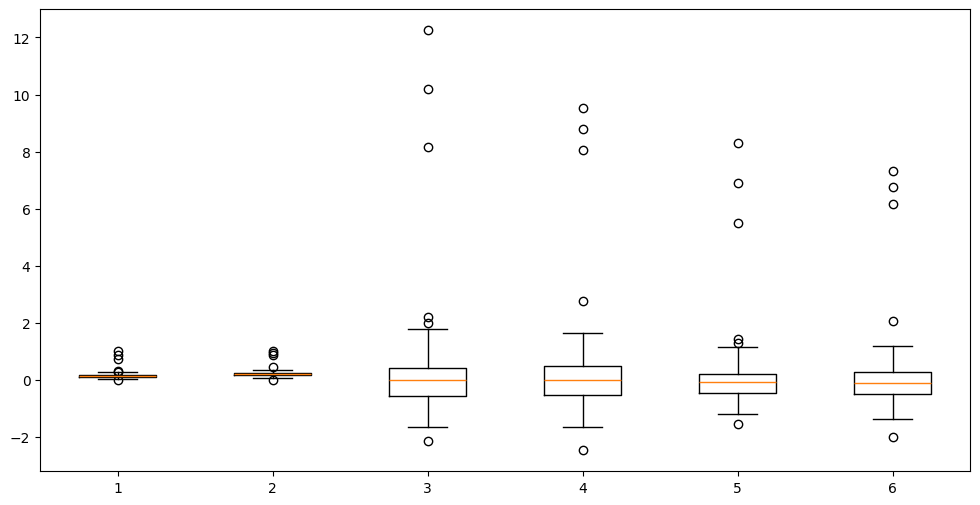

In [ ]:
#es 5

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt


df = pd.read_excel(r'c:\Users\Andrea C\Desktop\its\Py\datascience\roba_es_preprocess\dataset_scaling_esercizio.xlsx')

df.head()
df.describe()

scaler = MinMaxScaler()
stscaler = StandardScaler()
rscaler = RobustScaler()

df['Superficie_mq_scaled'] = scaler.fit_transform(df[['Superficie_mq']])
df['Prezzo_casa_migliaia_scaled'] = scaler.fit_transform(df[['Prezzo_casa_migliaia']])

df['Superficie_mq_stscaled'] = stscaler.fit_transform(df[['Superficie_mq']])
df['Prezzo_casa_migliaia_stscaled'] = stscaler.fit_transform(df[['Prezzo_casa_migliaia']])


df['Superficie_mq_rscaled'] = rscaler.fit_transform(df[['Superficie_mq']])
df['Prezzo_casa_migliaia_rscaled'] = rscaler.fit_transform(df[['Prezzo_casa_migliaia']])


print(df.head())

plt.figure(figsize=(12,6))
plt.boxplot([
])


    


In [ ]:
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy




df6 = pd.read_excel(r'c:\Users\Andrea C\Desktop\its\Py\datascience\roba_es_preprocess\dataset_encoding_esercizio.xlsx')
df6.head()

encoder = LabelEncoder()
encoded = encoder.fit_transform(df6['Classe_energetica'])
encoded.sort()

print(encoded)

encoded_oneh = pd.get_dummies(df6,columns=['Tipologia','Quartiere'])

print(encoded_oneh)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
    Classe_energetica  Tipologia_Appartamento  Tipologia_Attico  \
0                   A                   False              True   
1                   D                   False             False   
2                   D                    True             False   
3                   C                   False              True   
4                   B                   False              True   
..                ...                     ...               ...   
145                 D                   False              True   
146                 A                   False              True   
147                 D                   False              True   
148                 C   

In [ ]:
from sklearn.compose import ColumnTransformer



df7 = pd.read_excel(r'c:\Users\Andrea C\Desktop\its\Py\datascience\roba_es_preprocess\esercizio_columntransformer.xlsx')

df7.select_dtypes()

column_t = ColumnTransformer(
)

TypeError: data type 'età' not understood

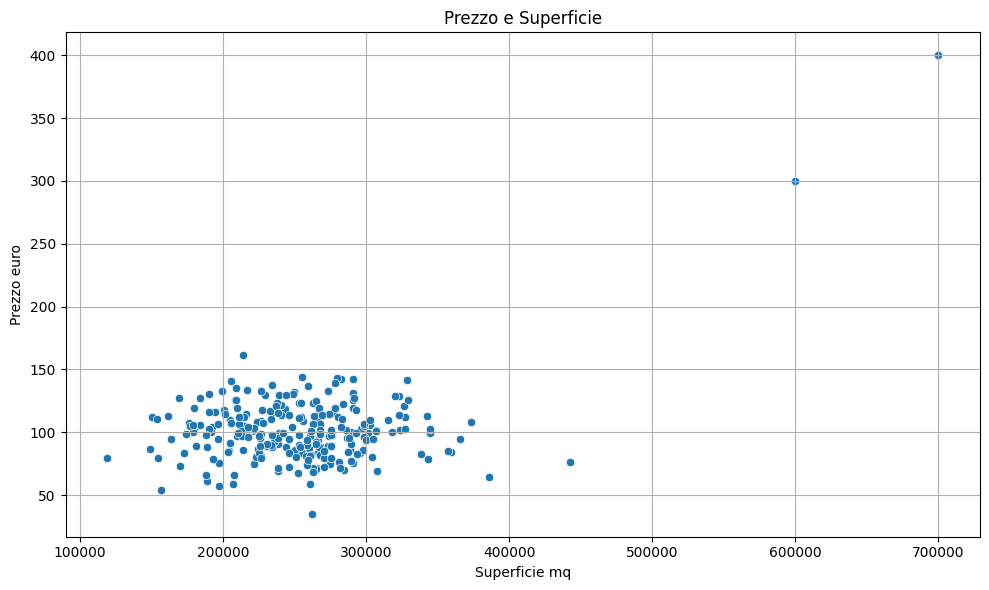

outlier prezzo :         Prezzo_euro  Superficie_mq     Tipologia Classe_energetica  Venduto
74   119012.744796      79.879652      Villetta                 A        0
179  386008.458329      64.825210  Appartamento                 B        1
209  442636.574533      76.042442        Attico                 A        0
250  600000.000000     300.000000        Attico                 A        1
251  700000.000000     400.000000       Rustico                 E        0
outlier_mq :         Prezzo_euro  Superficie_mq Tipologia Classe_energetica  Venduto
12   262098.113578      35.174653  Villetta                 D        0
228  214234.814537     161.577616   Rustico                 A        0
250  600000.000000     300.000000    Attico                 A        1
251  700000.000000     400.000000   Rustico                 E        0


In [7]:
#esercitazione 1 
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

dfes1 = pd.read_excel(r'/home/omori/Scrivania/ITS/datascience/materiale_es_preprocess/esercizio_immobili_preprocessing.xlsx')

#box e scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfes1,x='Prezzo_euro',y='Superficie_mq')
plt.title('Prezzo e Superficie')
plt.xlabel('Superficie mq')
plt.ylabel('Prezzo euro')
plt.grid(True)
plt.tight_layout()
plt.show()

#individuare gli otulier

q1_prezzo = np.percentile(dfes1['Prezzo_euro'],25)
q3_prezzo = np.percentile(dfes1['Prezzo_euro'],75)

q1_mq = np.percentile(dfes1['Superficie_mq'],25)
q3_mq = np.percentile(dfes1['Superficie_mq'],75)

iqr_prezzo = q3_prezzo-q1_prezzo
iqr_mq = q3_mq - q1_mq

lim_inf_prezzp = q1_prezzo - 1.5 * iqr_prezzo
lim_sup_prezzo = q3_prezzo + 1.5 * iqr_prezzo

lim_inf_mq =  q1_mq - 1.5 * iqr_mq
lim_sup_mq = q3_mq + 1.5 * iqr_mq


outlier = dfes1[(dfes1['Prezzo_euro'] < lim_inf_prezzp) | (dfes1['Prezzo_euro'] > lim_sup_prezzo)]
outlier_mq = dfes1[(dfes1['Superficie_mq'] < lim_inf_mq) | (dfes1['Superficie_mq'] > lim_sup_mq)] 



print("outlier prezzo : ", outlier)
print("outlier_mq : ", outlier_mq)



#rimozione/sostituzione outlier

dfes1_filtered_removed = dfes1[
    (dfes1['Prezzo_euro'] >= lim_inf_prezzp) & (dfes1['Prezzo_euro'] <= lim_sup_prezzo) &
    (dfes1['Superficie_mq'] >= lim_inf_mq) & (dfes1['Superficie_mq'] <= lim_sup_mq)
]

dfes1_filtered_replace = dfes1.loc[(dfes1['Prezzo_euro'] >= lim_inf_prezzp) & (dfes1['Prezzo_euro'] <= lim_sup_prezzo) &
                        (dfes1['Superficie_mq'] >= lim_inf_mq) & (dfes1['Superficie_mq'] <= lim_sup_mq)]



          

In [ ]:
dfes1['Prezzo_euro'],75)

iqr = q3_prezzo-q1_prezzo

lim_inf = q1_prezzo - 1.5 * iqr
lim_sup = q3_prezzo + 1.5 * iqr 


outlier = dfes1[(dfes1['Prezzo_euro'] < lim_inf) | (dfes1['Prezzo_euro'] > lim_sup)]
outlier_mq = dfes1[(dfes1['Superficie_mq'] < lim_inf) | (dfes1['Superficie_mq'] > lim_sup)] 


print("outlier prezzo : ", outlier)
print("outlier_mq : ", outlier_mq)


#

